# Welcome to the beautiful tutorial of this humble repo

## Research Question:

How can we identify and characterize the distinct cell types present in a healthy human PBMC sample using integrative analysis of single-cell ATAC-seq and gene expression data?

## Expected Results:

* Cluster Identification: The preprocessing, normalization, and visualization steps are expected to reveal distinct clusters in the data, each corresponding to different cell types or states within the PBMC sample. These clusters should be distinguishable based on their gene expression and chromatin accessibility profiles.
* Machine Learning Validation: Using clustering results as labels for machine learning models should validate the initial cluster identification, demonstrating that the data contains sufficient information to accurately classify cells into their respective types and states without prior labeling.
* Expected Answer: The integrative analysis of single-cell ATAC-seq and gene expression data enables effective identification and characterization of cell types within healthy human PBMC samples, providing insights into the cellular composition and functional states of immune cells in a healthy individual.

Use the cell below to download data (<50 mb in total)

In [4]:
!mkdir -p data
!wget -O data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
!wget -O data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv

If on Windows or command did not do anything, use this

In [5]:
%%bash
mkdir -p data
wget -O data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
wget -O data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv

--2024-05-05 17:23:09--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 108.162.192.122, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38844318 (37M) [binary/octet-stream]
Saving to: ‘data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5’

     0K .......... .......... .......... .......... ..........  0% 3.10M 12s
    50K .......... .......... .......... .......... ..........  0%  869K 28s
   100K .......... .......... .......... .......... ..........  0% 3.00M 23s
   150K .......... .......... .......... .......... ..........  0% 3.50M 20s
   200K .......... .......... .......... .......... ..........  0% 11.8M 16s
   250K .......... .......... .......... .......... ..........  0% 11.8M 14s
   300K .......... ....

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../scgog/')

In [13]:
%reload_ext autoreload
%autoreload 2

In [14]:
from data_preprocessing import *
from visualization import *
from data_loader import *
from benchmarking_ml_models import *

if you want sequences instead of expression:

In [4]:
use_sequence_data = False

careful, this file is 11 GB

In [ ]:
%%bash
wget -O data/refdata-gex-GRCh38-2020-A.tar.gz https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-GRCh38-2020-A.tar.gz
tar -zxvf data/refdata-gex-GRCh38-2020-A.tar.gz

Let's preprocess the data

In [16]:
data_path = "data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5"
ann_path = "data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv"

genome_path = "data/refdata-gex-GRCh38-2020-A/fasta/genome.fa" if use_sequence_data else None

mdata = preprocess_omics_data(data_path, ann_path, genome_path)

Added `interval` annotation for features from data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
> After make_unique, object has 2711 observations 134920 variables
> After quality control, object has 2391 observations 134920 variables
> After normalization, object has 2391 observations 134920 variables
> After merging with annotation, object has 2391 observations 134920 variables


The cornerstone of my project is the understanding that data preprocessing and preparation are paramount in any machine learning pipeline. From my experience, about 90% of a model's performance metrics can be attributed to how well the dataset is processed from its raw form. This meticulous preparation not only sets the stage but also amplifies the potential applications of machine learning. Once the data is correctly prepared, the possibilities become vast: from predicting cluster labels to validate the accuracy of clustering, to forecasting types of ATAC peaks on gene expressions or sequence data. These predictions hinge on various transformations of count data, as well as analyses based on nucleotide sequences aligned with the locations of peaks or genes. Thus, effective data preparation not only enhances model accuracy but also broadens the scope of potential insights and applications in genomic research.

# Let's analyze our data processing by clustering and creating figure of it

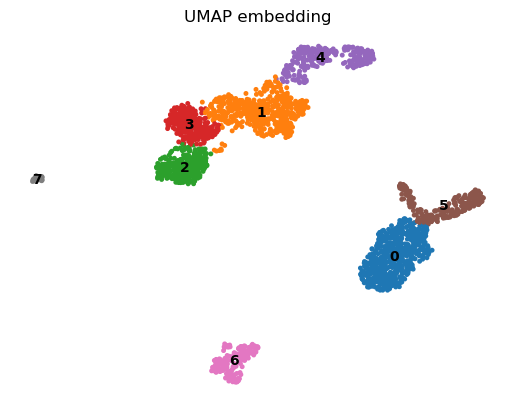

In [33]:
# Would you like compilated figure to be saved? If not, it will be only shown here, but you can copy it from notebook.
saved = False
file_path = visualize_umap(mdata, saved)

# Benchmarking ML models depends on the data you want to use: expression or sequence

On expression data:

In [17]:
batch_size=128
shuffle = True
use_sequence_data = False
# label only peaktype or cluster
label = "cluster"

data = "data/promoter-distal_seq_rna_class.csv" if use_sequence_data else mdata

loader = get_loader(data, use_sequence_data, label, batch_size, shuffle)


test_size = 0.4
random_state = 42
all_data = True
benchmark_models(loader, test_size, random_state, all_data)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.964472   0.964688  0.964472  0.964471
1    Gradient Boosting  0.966562   0.967090  0.966562  0.966655
2                  SVC  0.855799   0.922668  0.855799  0.871741
3  Logistic Regression  0.941484   0.943279  0.941484  0.941974


On sequence data and cluster as labels:

In [20]:
use_sequence_data = True
# label only peaktype or cluster
label = "cluster"

data = "data/promoter-distal_seq_rna_class.csv" if use_sequence_data else mdata

loader = get_loader(data, use_sequence_data, label, batch_size, shuffle)

all_data = True
benchmark_models(loader, test_size, random_state, all_data)

loaded
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.362025   0.414924  0.362025  0.232358
1    Gradient Boosting  0.342722   0.288261  0.342722  0.228849
2                  SVC  0.274446   0.242478  0.274446  0.252592
3  Logistic Regression  0.084810   0.206873  0.084810  0.083756


On sequence data and peak type as labels:

In [21]:
# label only peaktype or cluster
label = "peaktype"

loader = get_loader(data, use_sequence_data, label, batch_size, shuffle)

all_data = True
benchmark_models(loader, test_size, random_state, all_data)

loaded
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.783070   0.694743  0.783070  0.695762
1    Gradient Boosting  0.785601   0.617169  0.785601  0.691273
2                  SVC  0.724051   0.696466  0.724051  0.708232
3  Logistic Regression  0.523972   0.666511  0.523972  0.566593
